In [10]:
import matplotlib.pyplot as plt

import numpy as np
from tsp_solver import TSPSolver, GeneticConfig

In [11]:
def run_test(mutation_rate, crossover_rate, population_size):
    config = GeneticConfig(
        generations=200,
        population_size=population_size,
        crossover_rate=crossover_rate,
        mutation_rate=mutation_rate,
        tournament_size=3,
    )

    distance_file = "15.in"

    solver = TSPSolver(distance_file=distance_file)

    best_distances, best_route = solver.solve(config)

    return best_distances, best_route

In [12]:
mutation_rates = [0.0, 0.05, 0.1, 0.25, 0.5, 0.75, 1.0]
crossover_rate = 0.9
population_size = 20
num_tests = 100


all_best_distances = {mr: [] for mr in mutation_rates}


for mr in mutation_rates:
    for _ in range(num_tests):
        best_distances, _ = run_test(mr, crossover_rate, population_size)
        all_best_distances[mr].append(best_distances)


average_best_distances = {}

for mr, distances in all_best_distances.items():
    distances_array = np.array(distances)
    average_best_distances[mr] = np.mean(distances_array, axis=0)

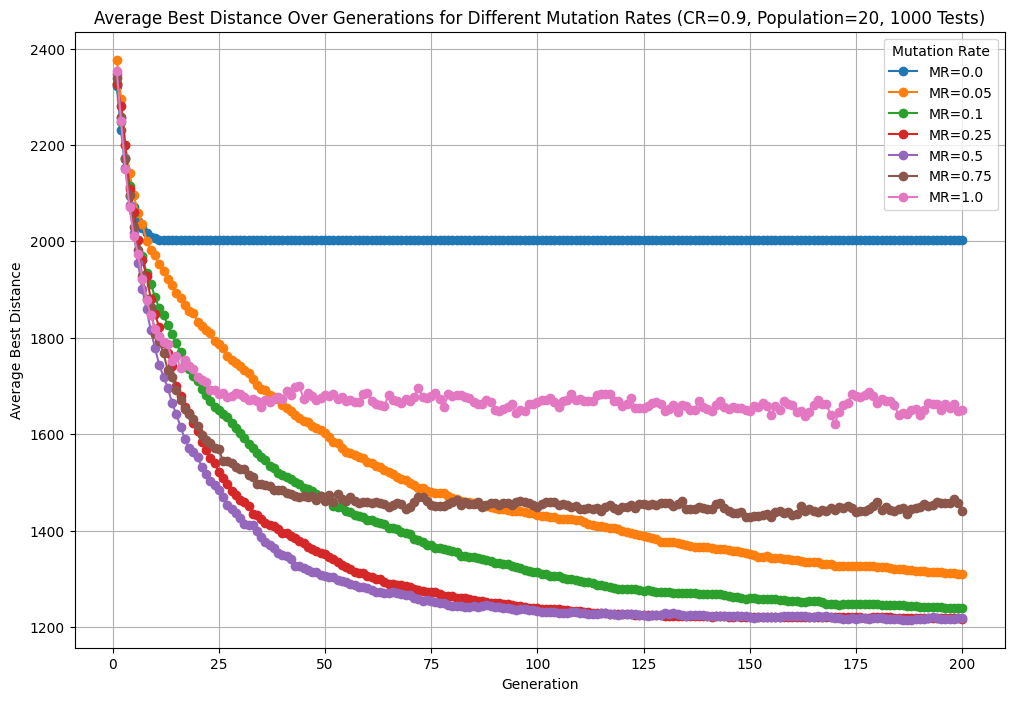

In [13]:
plt.figure(figsize=(12, 8))


for mr, avg_distances in average_best_distances.items():
    plt.plot(
        range(1, len(avg_distances) + 1), avg_distances, marker="o", label=f"MR={mr}"
    )


plt.title(
    f"Average Best Distance Over Generations for Different Mutation Rates (CR={crossover_rate}, Population={population_size}, 1000 Tests)"
)
plt.xlabel("Generation")
plt.ylabel("Average Best Distance")
plt.legend(title="Mutation Rate")
plt.grid(True)
plt.show()

In [8]:
mutation_rate = 0.1
crossover_rates = [0.0, 0.1, 0.5, 0.7, 0.8, 0.9, 0.95, 1.0]
population_size = 20
num_tests = 100

all_best_distances = {cr: [] for cr in crossover_rates}

for cr in crossover_rates:
    for _ in range(num_tests):
        best_distances, _ = run_test(mutation_rate, cr, population_size)
        all_best_distances[cr].append(best_distances)

average_best_distances = {}

for cr, distances in all_best_distances.items():
    distances_array = np.array(distances)
    average_best_distances[cr] = np.mean(distances_array, axis=0)

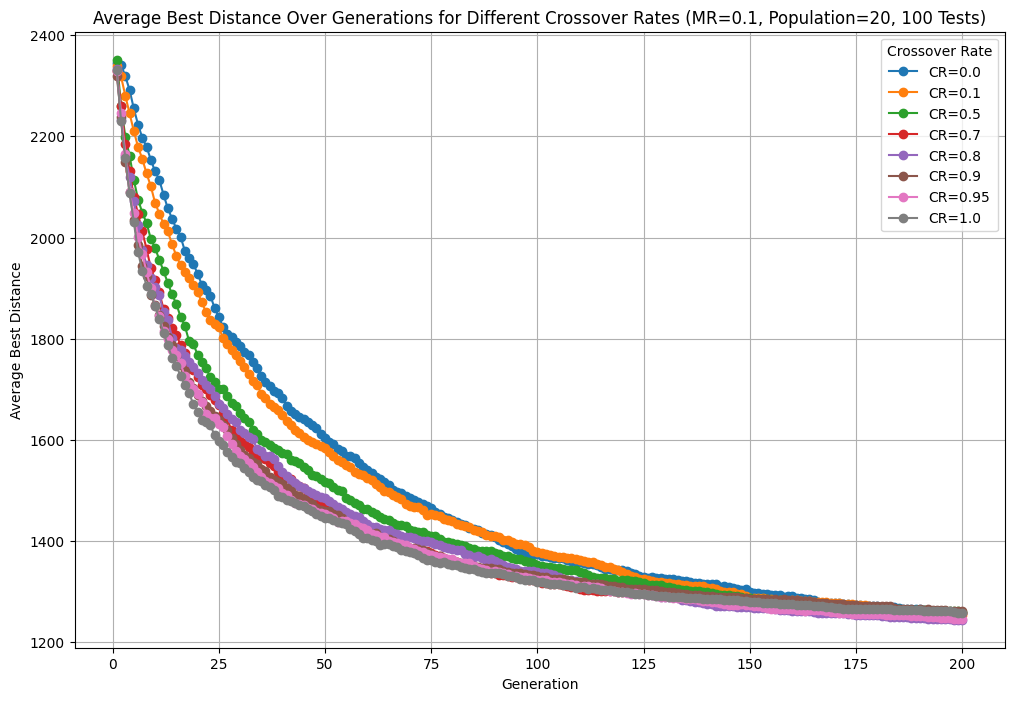

In [9]:
plt.figure(figsize=(12, 8))

for cr, avg_distances in average_best_distances.items():
    plt.plot(
        range(1, len(avg_distances) + 1), avg_distances, marker="o", label=f"CR={cr}"
    )

plt.title(
    f"Average Best Distance Over Generations for Different Crossover Rates (MR={mutation_rate}, Population={population_size}, 100 Tests)"
)
plt.xlabel("Generation")
plt.ylabel("Average Best Distance")
plt.legend(title="Crossover Rate")
plt.grid(True)
plt.show()